### PROBLEM STATEMENT: We will construct a linear model that explains the relationship a car's mileage (mpg) has with its other attributes

## Import Libraries

### Step 1:Import the libraries

In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
  

In [2]:
### Step 2:Load the file

## Load and review data

In [3]:
car_df = pd.read_csv("auto-mpg.csv")  


In [4]:
car_df.shape

(398, 9)

In [5]:
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
296,27.4,4,121.0,80,2670,15.0,79,1,amc spirit dl
115,15.0,8,350.0,145,4082,13.0,73,1,chevrolet monte carlo s
278,31.5,4,89.0,71,1990,14.9,78,2,volkswagen scirocco
16,18.0,6,199.0,97,2774,15.5,70,1,amc hornet
105,13.0,8,360.0,170,4654,13.0,73,1,plymouth custom suburb
134,16.0,6,258.0,110,3632,18.0,74,1,amc matador
210,19.0,6,156.0,108,2930,15.5,76,3,toyota mark ii
177,23.0,4,115.0,95,2694,15.0,75,2,audi 100ls
187,17.5,8,305.0,140,4215,13.0,76,1,chevrolet chevelle malibu classic
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii


In [6]:
car_df.drop("car name",axis=1,inplace=True)

In [7]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin
218,36.0,4,79.0,58,1825,18.6,77,europe
171,24.0,4,134.0,96,2702,13.5,75,asia
384,32.0,4,91.0,67,1965,15.7,82,asia
362,24.2,6,146.0,120,2930,13.8,81,asia
274,20.3,5,131.0,103,2830,15.9,78,europe
286,17.6,8,302.0,129,3725,13.4,79,america
223,15.5,8,318.0,145,4140,13.7,77,america
282,22.3,4,140.0,88,2890,17.3,79,america
307,26.8,6,173.0,115,2700,12.9,79,america
62,13.0,8,350.0,165,4274,12.0,72,america


In [8]:
### One hot encoding
car_df = pd.get_dummies(car_df, columns=['origin']) ### one hot encoding
car_df.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
198,33.0,4,91.0,53,1795,17.4,76,False,True,False
93,14.0,8,318.0,150,4237,14.5,73,True,False,False
105,13.0,8,360.0,170,4654,13.0,73,True,False,False
320,37.0,4,119.0,92,2434,15.0,80,False,True,False
351,34.4,4,98.0,65,2045,16.2,81,True,False,False
146,28.0,4,90.0,75,2125,14.5,74,True,False,False
160,17.0,6,231.0,110,3907,21.0,75,True,False,False
119,20.0,4,114.0,91,2582,14.0,73,False,False,True
59,23.0,4,97.0,54,2254,23.5,72,False,False,True
14,24.0,4,113.0,95,2372,15.0,70,False,True,False


In [9]:
car_df.isnull().sum()

mpg               0
cyl               0
disp              0
hp                0
wt                0
acc               0
yr                0
origin_america    0
origin_asia       0
origin_europe     0
dtype: int64

In [10]:
car_df.dtypes


mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america       bool
origin_asia          bool
origin_europe        bool
dtype: object

## Dealing with Missing Values

In [11]:
#A quick summary of the data columns
car_df.describe()

,mpg,cyl,disp,wt,acc,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000


In [12]:
car_df.describe(include="all")

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398,398,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,150,NaN,NaN,NaN,True,False,False
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,249,319,328
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,NaN,NaN,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,NaN,NaN,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,NaN,NaN,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,NaN,NaN,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,NaN,NaN,NaN


In [13]:
car_df.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   origin_america  398 non-null    bool   
 8   origin_asia     398 non-null    bool   
 9   origin_europe   398 non-null    bool   
dtypes: bool(3), float64(3), int64(3), object(1)
memory usage: 23.1+ KB


In [14]:
# hp is missing cause it does not seem to be recognized as a numerical column!
car_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                 object
wt                  int64
acc               float64
yr                  int64
origin_america       bool
origin_asia          bool
origin_europe        bool
dtype: object

In [15]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_df.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
car_df[hpIsDigit['hp'] == False]   # from temp take only those rows where hp has false


,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,?,2046,19.0,71,True,False,False
126,21.0,6,200.0,?,2875,17.0,74,True,False,False
330,40.9,4,85.0,?,1835,17.3,80,False,False,True
336,23.6,4,140.0,?,2905,14.3,80,True,False,False
354,34.5,4,100.0,?,2320,15.8,81,False,False,True
374,23.0,4,151.0,?,3035,20.5,82,True,False,False


In [16]:
car_df["hp"]=car_df["hp"].replace("?",np.nan)
car_df["hp"]=car_df["hp"].astype(float)

In [17]:
median1=car_df["hp"].median()
median1

93.5

In [18]:
car_df["hp"].replace(np.nan,median1,inplace=True)

In [19]:
car_df[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,93.5,2046,19.0,71,True,False,False
126,21.0,6,200.0,93.5,2875,17.0,74,True,False,False
330,40.9,4,85.0,93.5,1835,17.3,80,False,False,True
336,23.6,4,140.0,93.5,2905,14.3,80,True,False,False
354,34.5,4,100.0,93.5,2320,15.8,81,False,False,True
374,23.0,4,151.0,93.5,3035,20.5,82,True,False,False


In [20]:
car_df.dtypes

mpg               float64
cyl                 int64
disp              float64
hp                float64
wt                  int64
acc               float64
yr                  int64
origin_america       bool
origin_asia          bool
origin_europe        bool
dtype: object

In [21]:
### Duplicates?
duplicate=car_df.duplicated()
duplicate.sum()

0

There are various ways to handle missing values. Drop the rows, replace missing values with median values etc. of the 398 rows 6 have NAN in the hp column. We could drop those 6 rows - which might not be a good idea under all situations


## BiVariate Plots

A bivariate analysis among the different variables can be done using scatter matrix plot. Seaborn libs create a dashboard reflecting useful information about the dimensions. The result can be stored as a .png file. 

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

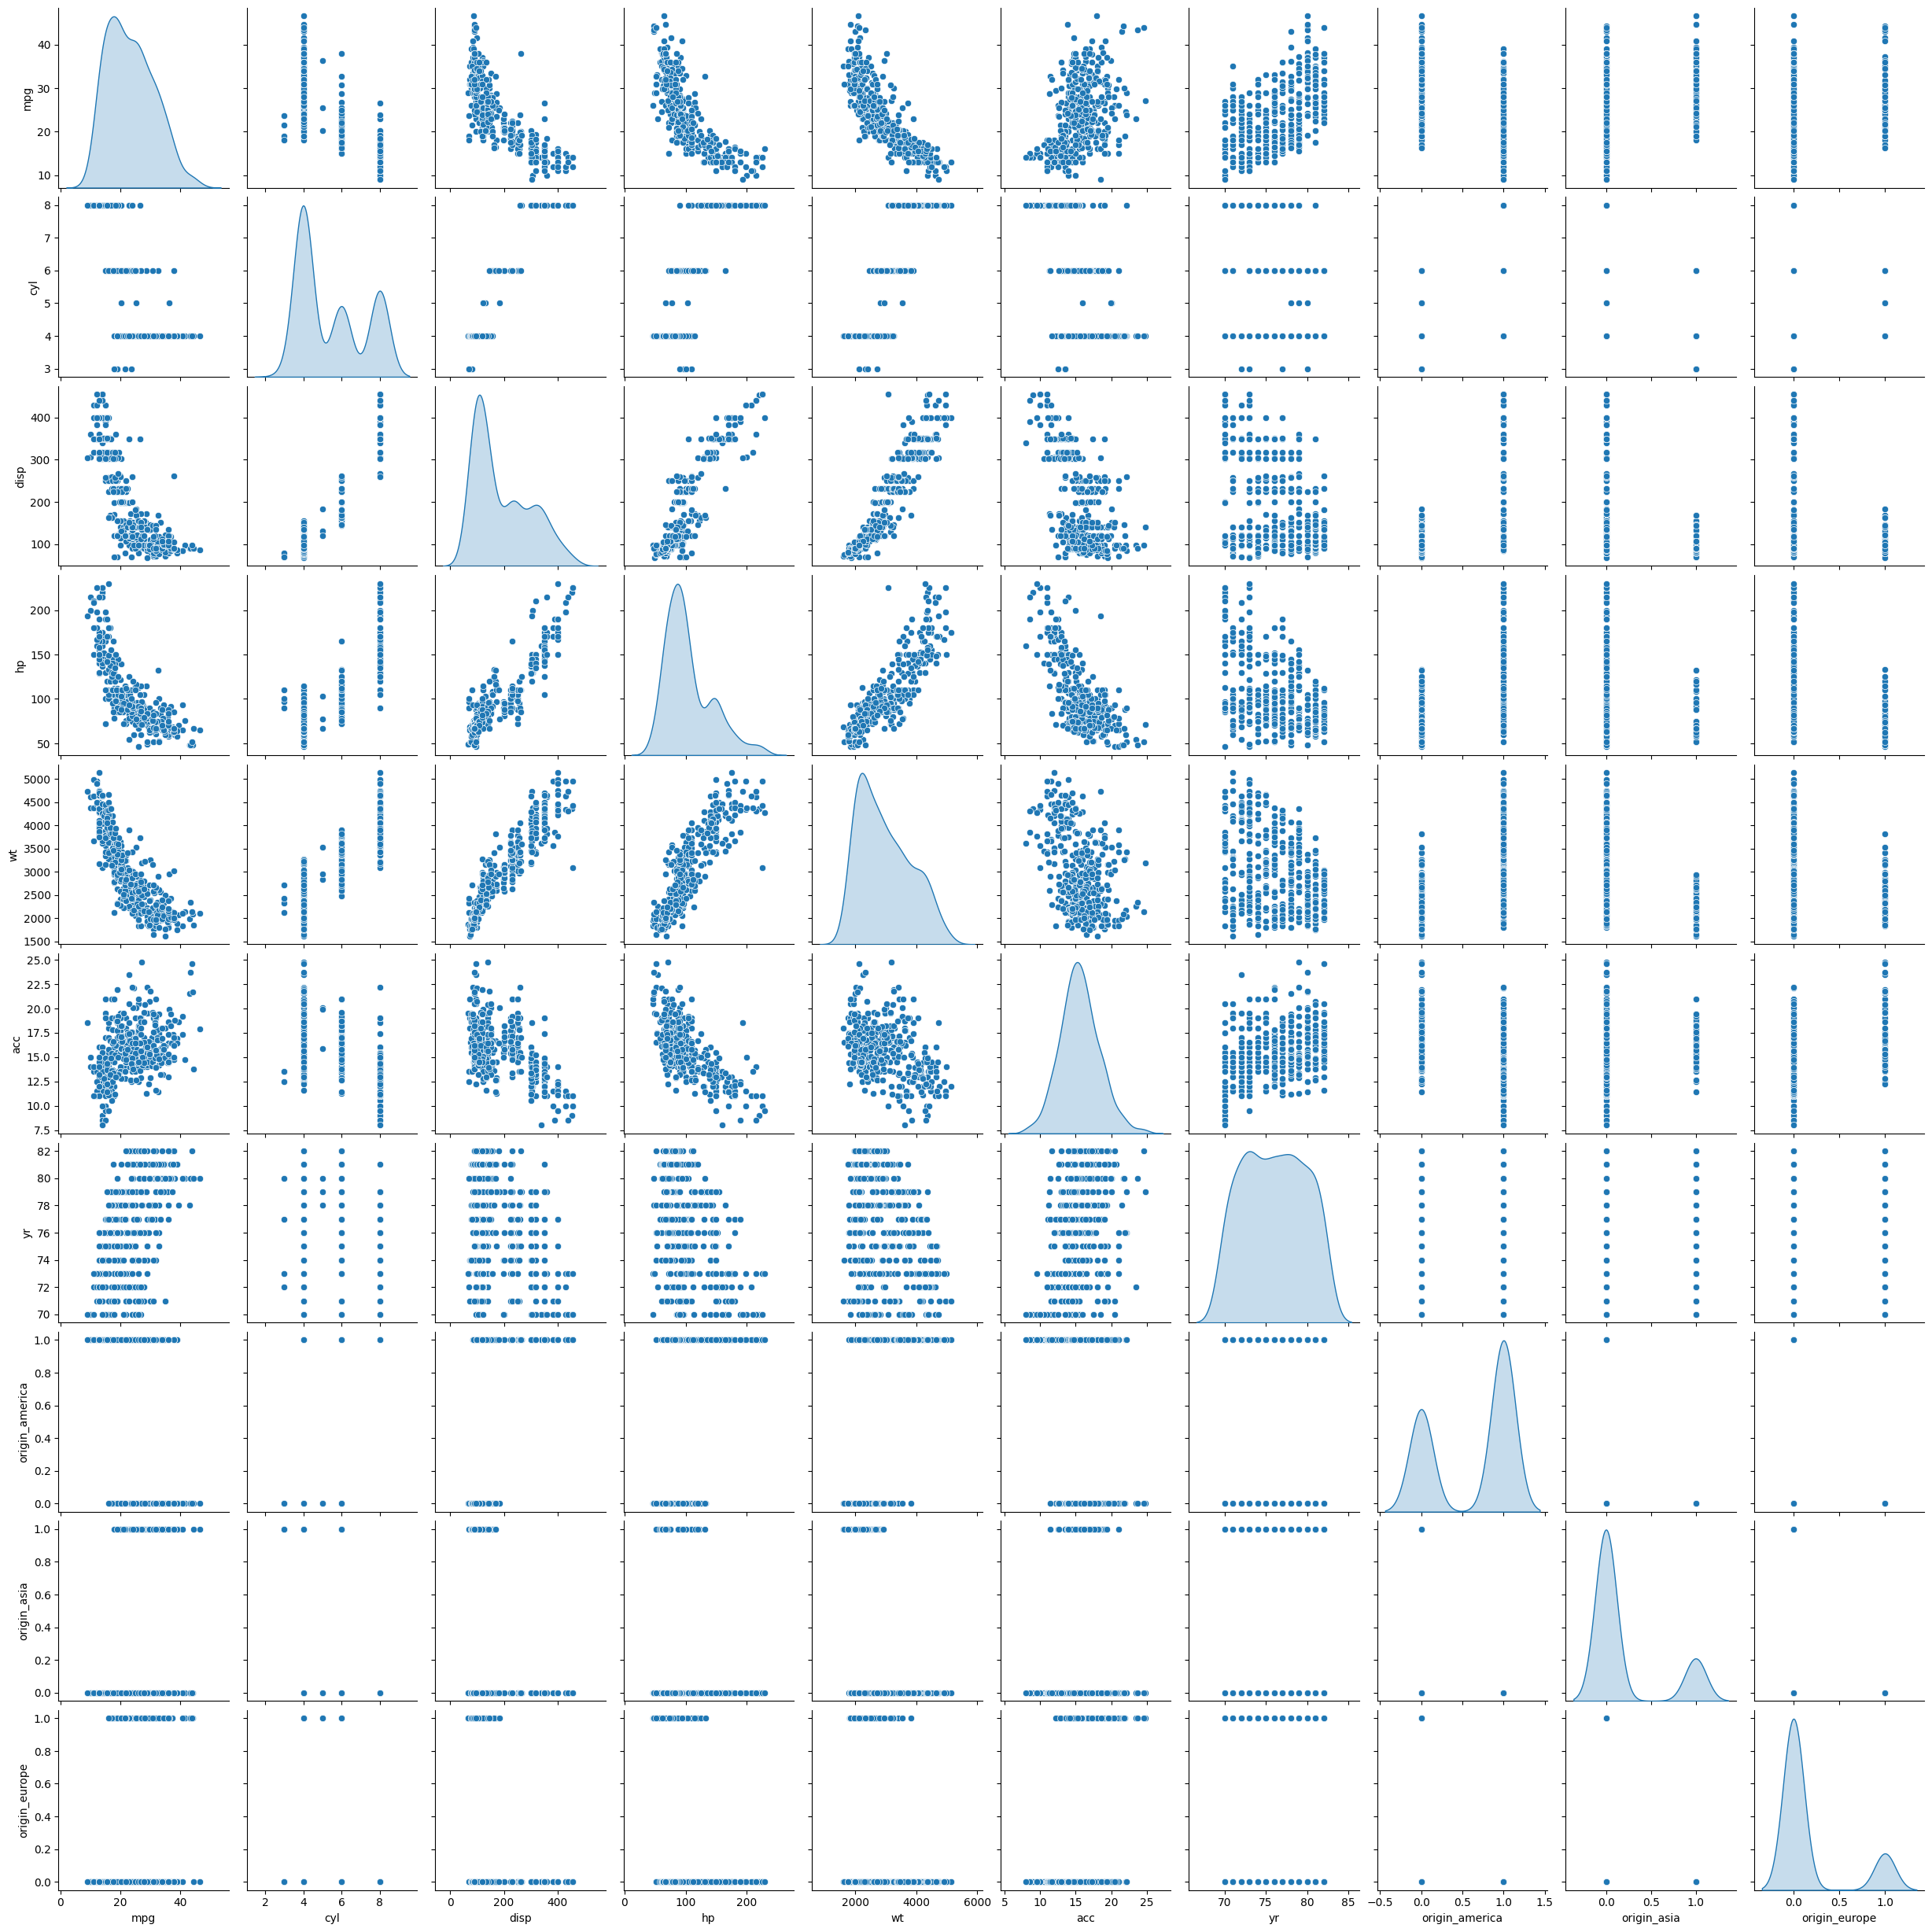

In [22]:
sns.pairplot(car_df,diag_kind="kde")

Observation between 'mpg' and other attributes indicate the relationship is not really linear. However, the plots also indicate that linearity would still capture quite a bit of useful information/pattern. Several assumptions of classical linear regression seem to be violated, including the assumption of no Heteroscedasticity


## Split Data

In [23]:
# lets build our linear model
# independant variables
X = car_df.drop(['mpg'], axis=1)
# the dependent variable
y = car_df[['mpg']]

In [24]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

## Fit Linear Model

In [25]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)


LinearRegression()

Here are the coefficients for each variable and the intercept

The score (R^2) for in-sample and out of sample

In [26]:
model_1.score(X_train, y_train)

0.8215521225570097

In [27]:
#out of sample score (R^2)

model_1.score(X_test, y_test)


0.8226939742691542

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.9044458086107225


In [29]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8638301589540318
